In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import pathlib
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import Model

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("raghunandanbalasub/boat-images")

print("Path to dataset files:", path)

100%|██████████| 143M/143M [00:01<00:00, 139MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1


In [ ]:
dir=pathlib.Path(path)
print(dir)

/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1


In [ ]:
for dir1 in dir.iterdir():
  print(dir1)

/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input


In [ ]:
dir1=dir.parent/'1'/'input'

print(dir1)

for dir2 in dir1.iterdir():
  print(dir2)

/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/freight_boat
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/sailboat
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/ferry_boat
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/paper_boat
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/inflatable_boat
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/gondola
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/buoy
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/cruise_ship
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/kayak


In [ ]:
# define directory paths

image_dir="/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input"
base_dir="/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/split_data"

In [ ]:
# create directories for train,validation, and test

train_dir=os.path.join(base_dir,"train")
val_dir=os.path.join(base_dir,"val")
test_dir=os.path.join(base_dir,"test")

print(train_dir)
print(val_dir)
print(test_dir)

/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/split_data/train
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/split_data/val
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/split_data/test


In [ ]:
# create subdirectory for each class

for directory in [train_dir,val_dir,test_dir]:
  if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
os.listdir(base_dir)

['test', 'val', 'train']

In [ ]:
# create subdirectory within train, val, test for each class

class_names=[]

for i in dir1.iterdir():
  class_names.append(i.stem)

In [ ]:
print(class_names)

['freight_boat', 'sailboat', 'ferry_boat', 'paper_boat', 'inflatable_boat', 'gondola', 'buoy', 'cruise_ship', 'kayak']


In [ ]:
for class_name in class_names:
  os.makedirs(os.path.join(train_dir,class_name))
  os.makedirs(os.path.join(val_dir,class_name))
  os.makedirs(os.path.join(test_dir,class_name))

In [ ]:
print(train_dir)
print(val_dir)
print(test_dir)

/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/split_data/train
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/split_data/val
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/split_data/test


In [ ]:
os.listdir(base_dir)

['test', 'val', 'train']

In [ ]:
os.listdir(train_dir)

['freight_boat',
 'sailboat',
 'ferry_boat',
 'paper_boat',
 'inflatable_boat',
 'gondola',
 'buoy',
 'cruise_ship',
 'kayak']

In [ ]:
os.listdir(val_dir)

['freight_boat',
 'sailboat',
 'ferry_boat',
 'paper_boat',
 'inflatable_boat',
 'gondola',
 'buoy',
 'cruise_ship',
 'kayak']

In [ ]:
os.listdir(test_dir)

['freight_boat',
 'sailboat',
 'ferry_boat',
 'paper_boat',
 'inflatable_boat',
 'gondola',
 'buoy',
 'cruise_ship',
 'kayak']

In [ ]:
# split the dataset

image_paths=[]
labels=[]


for class_name in class_names:
  class_path=os.path.join(image_dir,class_name)
  if os.path.isdir(class_path):
    #print(class_path)
    for image_name in os.listdir(class_path):
      image_paths.append(os.path.join(class_path,image_name))
      labels.append(class_name)

In [ ]:
for i,j in zip(image_paths,labels):
  print(i,j)

/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/freight_boat/2.jpg freight_boat
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/freight_boat/17.jpg freight_boat
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/freight_boat/18.jpg freight_boat
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/freight_boat/22.jpg freight_boat
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/freight_boat/23.jpg freight_boat
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/freight_boat/6.jpg freight_boat
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/freight_boat/10.jpg freight_boat
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/freight_boat/14.jpg freight_boat
/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/freight_boat/19.jp

### Now we have x and coresponding y data now we need to split train,test,validation using train_test_split

In [ ]:
train_val_path,test_path,train_val_labels,test_labels=train_test_split(image_paths,labels,test_size=0.2,random_state=43,stratify=labels,shuffle=True)

In [ ]:
print(len(train_val_path))
print(len(train_val_labels))

print(len(test_path))
print(len(test_labels))

929
929
233
233


In [ ]:
train_path,val_path,train_labels,val_labels=train_test_split(train_val_path,train_val_labels,stratify=train_val_labels,random_state=43,test_size=0.2)

In [ ]:
print(len(train_path))
print(len(train_labels))

print(len(val_path))
print(len(val_labels))

743
743
186
186


In [ ]:
print(test_path)

['/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/gondola/105.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/gondola/33.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/sailboat/360.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/buoy/26.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/sailboat/208.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/sailboat/362.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/paper_boat/22.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/sailboat/276.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/buoy/2.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/inflatable_boat/9.jpg', '/root/

In [ ]:
print(test_labels)

['gondola', 'gondola', 'sailboat', 'buoy', 'sailboat', 'sailboat', 'paper_boat', 'sailboat', 'buoy', 'inflatable_boat', 'gondola', 'cruise_ship', 'cruise_ship', 'sailboat', 'gondola', 'gondola', 'kayak', 'ferry_boat', 'cruise_ship', 'cruise_ship', 'sailboat', 'kayak', 'cruise_ship', 'gondola', 'cruise_ship', 'gondola', 'ferry_boat', 'cruise_ship', 'cruise_ship', 'sailboat', 'cruise_ship', 'sailboat', 'kayak', 'cruise_ship', 'sailboat', 'gondola', 'kayak', 'paper_boat', 'sailboat', 'sailboat', 'sailboat', 'buoy', 'kayak', 'gondola', 'gondola', 'sailboat', 'kayak', 'kayak', 'gondola', 'sailboat', 'gondola', 'cruise_ship', 'sailboat', 'sailboat', 'sailboat', 'kayak', 'kayak', 'sailboat', 'buoy', 'kayak', 'sailboat', 'kayak', 'ferry_boat', 'buoy', 'kayak', 'sailboat', 'kayak', 'kayak', 'buoy', 'sailboat', 'kayak', 'kayak', 'sailboat', 'sailboat', 'kayak', 'cruise_ship', 'gondola', 'freight_boat', 'sailboat', 'ferry_boat', 'sailboat', 'buoy', 'sailboat', 'cruise_ship', 'freight_boat', 'gond

In [ ]:
os.listdir(test_dir)

['freight_boat',
 'sailboat',
 'ferry_boat',
 'paper_boat',
 'inflatable_boat',
 'gondola',
 'buoy',
 'cruise_ship',
 'kayak']

In [ ]:
test_dir

'/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/split_data/test'

In [ ]:
# Move images to their respective directories


def move_images(image_paths,labels,target_dir):
  for img_path,label in zip(image_paths,labels):
    class_dir=os.path.join(target_dir,label)
    shutil.copy(img_path,class_dir)







move_images(train_path,train_labels,train_dir)
move_images(val_path,val_labels,val_dir)
move_images(test_path,test_labels,test_dir)

In [ ]:
# set up Imagedatagenerator for training  validating and testing with augumenation

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen=ImageDataGenerator(
    rescale=1./255
)

test_datagen=ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    shuffle=True,

)

val_generator=test_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=False)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=False)

Found 1054 images belonging to 9 classes.
Found 368 images belonging to 9 classes.
Found 325 images belonging to 9 classes.


In [ ]:
class_name=list(train_generator.class_indices)
print(class_name)

['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']


In [ ]:
list(zip(train_generator.class_indices,range(len(class_names))))

[('buoy', 0),
 ('cruise_ship', 1),
 ('ferry_boat', 2),
 ('freight_boat', 3),
 ('gondola', 4),
 ('inflatable_boat', 5),
 ('kayak', 6),
 ('paper_boat', 7),
 ('sailboat', 8)]

[0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]


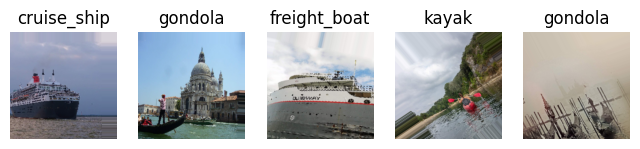

In [ ]:
images,labels=next(train_generator)

plt.figure(figsize=(8,8))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(images[i])
  plt.axis("off")
  print(labels[i])
  plt.title(class_name[np.argmax(labels[i])])
plt.show()

# Building the CNN model

In [ ]:
Sequential_CNN_model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(len(class_name),activation="softmax")
])
Sequential_CNN_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,041 (125.16 KB)

 Trainable params: 32,041 (125.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Sequential_CNN_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history_CNN=Sequential_CNN_model.fit(train_generator,epochs=20,validation_data=val_generator)

Epoch 1/20
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.3293 - loss: 1.8373

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 778ms/step - accuracy: 0.3295 - loss: 1.8363 - val_accuracy: 0.3288 - val_loss: 1.8106
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 590ms/step - accuracy: 0.3345 - loss: 1.7748 - val_accuracy: 0.3288 - val_loss: 1.8045
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 577ms/step - accuracy: 0.3492 - loss: 1.7947 - val_accuracy: 0.3315 - val_loss: 1.7977
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 582ms/step - accuracy: 0.3343 - loss: 1.7854 - val_accuracy: 0.3424 - val_loss: 1.7963
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 612ms/step - accuracy: 0.3643 - loss: 1.7417 - val_accuracy: 0.3315 - val_loss: 1.8082
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 615ms/step - accuracy: 0.3726 - loss: 1.7423 - val_accuracy: 0.3560 - val_loss: 1.7380
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 679ms/step - accuracy: 0.3693 - loss: 1.7060 - val_accuracy: 0.3668 - val_loss: 1.7061
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 788ms/step - accuracy: 0.4088 - loss: 1.6436 - val_accuracy: 0.380

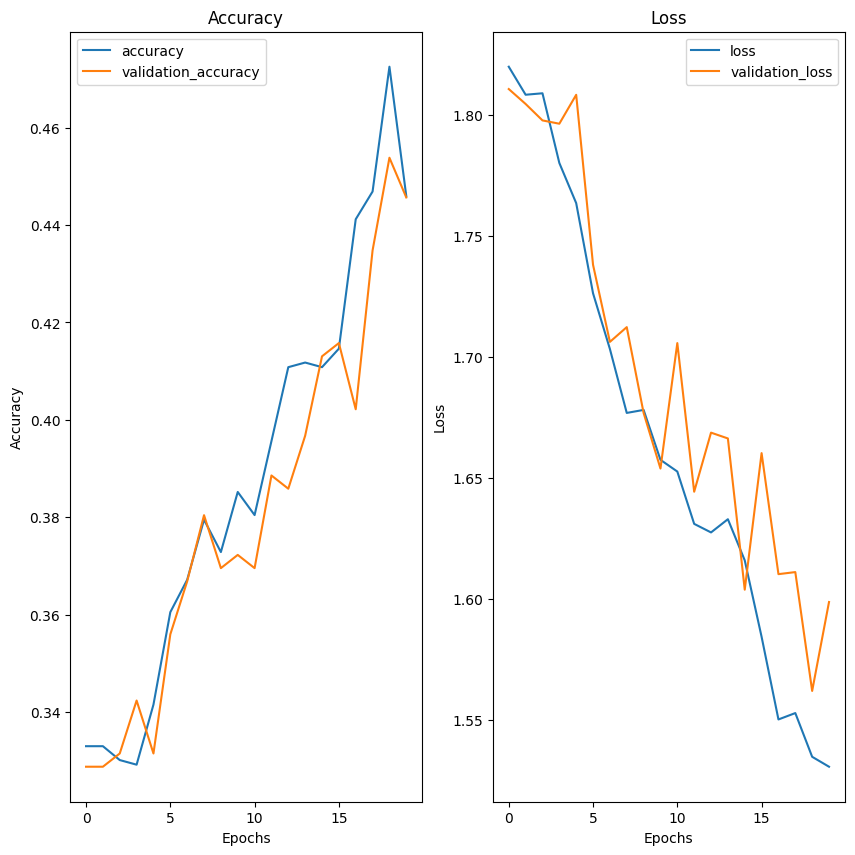

In [ ]:

# plotting the Training loss and accuracy again epoches


plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.plot(history_CNN.history["accuracy"],label="accuracy")
plt.plot(history_CNN.history["val_accuracy"],label="validation_accuracy")
plt.legend()
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.subplot(1,2,2)
plt.plot(history_CNN.history["loss"],label="loss")
plt.plot(history_CNN.history["val_loss"],label="validation_loss")
plt.legend()
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [ ]:
history_CNN.params

{'verbose': 'auto', 'epochs': 20, 'steps': 33}

In [ ]:
test_loss,test_accuracy=Sequential_CNN_model.evaluate(test_generator)

print(f"CNN model test loss:{test_loss}")
print(f"CNN model test accuarcy:{test_accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 241ms/step - accuracy: 0.4524 - loss: 1.6755
CNN model test loss:1.5108476877212524
CNN model test accuarcy:0.4923076927661896


In [ ]:
prediction=Sequential_CNN_model.predict(test_generator)

prediction_class=np.argmax(prediction,axis=1)
print(prediction_class)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step
[8 8 1 4 8 8 8 1 8 8 6 4 4 8 6 8 1 1 4 1 1 1 4 1 8 1 1 1 8 1 4 1 1 6 1 1 4
 8 4 1 8 8 1 1 1 4 4 4 1 8 1 8 1 1 8 1 1 8 1 4 1 1 1 1 8 4 1 8 1 6 8 8 8 4
 8 8 4 8 1 1 8 1 8 1 1 4 8 8 8 4 1 4 4 8 4 6 4 4 4 4 4 4 4 4 4 6 4 8 8 8 4
 4 4 4 4 4 4 4 4 8 8 4 4 4 1 4 4 1 4 1 4 4 4 4 4 4 4 4 4 8 4 4 4 4 4 4 4 8
 4 8 1 6 6 6 6 6 6 1 1 4 1 6 4 1 4 1 4 4 1 6 4 4 6 4 1 6 6 8 4 4 6 6 8 4 6
 1 1 8 6 1 6 6 6 8 6 6 6 4 1 1 4 1 8 4 6 6 1 4 6 6 8 8 8 8 8 1 8 8 8 4 8 1
 8 1 8 8 8 8 8 1 8 4 8 8 8 6 4 8 8 6 6 8 8 4 8 8 8 6 6 8 8 8 8 8 4 1 8 8 8
 1 4 1 8 6 8 8 8 8 1 6 4 8 8 8 8 6 8 1 8 8 8 8 1 8 1 8 8 1 1 8 1 4 4 8 4 8
 6 6 6 8 8 8 8 8 8 4 8 1 8 8 4 8 8 8 6 6 4 1 8 4 8 4 1 8 4]


In [ ]:
actual_class=test_generator.classes
print(actual_class)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]


In [ ]:
class_label=list(test_generator.class_indices.keys())
print(class_label)

['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']


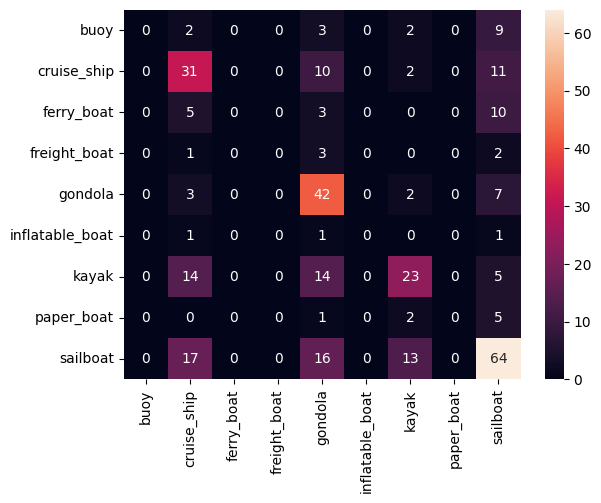

In [ ]:
cm=confusion_matrix(actual_class,prediction_class)

sns.heatmap(cm,annot=True,xticklabels=class_label,yticklabels=class_label)
plt.show()

In [ ]:
print(classification_report(actual_class,prediction_class,target_names=class_label))

                 precision    recall  f1-score   support

           buoy       0.00      0.00      0.00        16
    cruise_ship       0.42      0.57      0.48        54
     ferry_boat       0.00      0.00      0.00        18
   freight_boat       0.00      0.00      0.00         6
        gondola       0.45      0.78      0.57        54
inflatable_boat       0.00      0.00      0.00         3
          kayak       0.52      0.41      0.46        56
     paper_boat       0.00      0.00      0.00         8
       sailboat       0.56      0.58      0.57       110

       accuracy                           0.49       325
      macro avg       0.22      0.26      0.23       325
   weighted avg       0.42      0.49      0.45       325



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Building MobileNet model

In [ ]:
print(len(image_paths))
print(len(labels))

1162
1162


In [ ]:
train_path,test_path,train_label,test_label=train_test_split(image_paths,labels,test_size=0.3,random_state=1,shuffle=True,stratify=labels)

In [ ]:
print(len(train_path))
print(len(train_label))

print("----------------")
print(len(test_path))
print(len(test_label))

813
813
----------------
349
349


In [ ]:
# we need to move the train_path,test_path,val-path to their respective directory

print(test_path)
print(os.listdir(train_dir))
print(train_dir)


['/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/cruise_ship/60.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/sailboat/319.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/freight_boat/9.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/buoy/49.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/kayak/87.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/gondola/55.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/sailboat/150.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/sailboat/316.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/cruise_ship/80.jpg', '/root/.cache/kagglehub/datasets/raghunandanbalasub/boat-images/versions/1/input/cruise_ship/56.jpg', '/

In [ ]:
def moveimage(image_paths,labels,target_dir):
  for image_path,label in zip(image_paths,labels):
    class_dir=os.path.join(target_dir,label)
    shutil.copy(image_path,class_dir)


moveimage(train_path,train_label,train_dir)
moveimage(test_path,test_label,test_dir)

In [ ]:
print(len(list(pathlib.Path(train_dir).rglob("*.jpg"))))
print(len(list(pathlib.Path(test_dir).rglob("*.jpg"))))

1005
588


In [ ]:
# ImageDataGenerator

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="reflect",
    validation_split=0.2
)

val_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)


In [ ]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=True,
    subset="training")

val_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical",
    subset="validation")

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

Found 807 images belonging to 9 classes.
Found 198 images belonging to 9 classes.
Found 588 images belonging to 9 classes.


In [ ]:
class_name=list(train_generator.class_indices)
print(class_name)

['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']


In [ ]:
list(zip(train_generator.class_indices,range(len(class_names))))

[('buoy', 0),
 ('cruise_ship', 1),
 ('ferry_boat', 2),
 ('freight_boat', 3),
 ('gondola', 4),
 ('inflatable_boat', 5),
 ('kayak', 6),
 ('paper_boat', 7),
 ('sailboat', 8)]

True label: gondola
True label: sailboat
True label: cruise_ship
True label: sailboat
True label: gondola


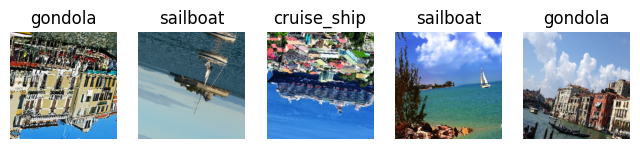

In [ ]:
images, labels = next(val_generator)

# Get class names from val_generator
class_name = list(val_generator.class_indices.keys())

# Set up the figure for visualization
plt.figure(figsize=(8, 8))

# Plot the first 5 images in the batch
for i in range(5):
    plt.subplot(1, 5, i + 1)  # Create 1 row, 5 columns for subplots
    plt.imshow(images[i])  # Display the i-th image
    plt.axis("off")  # Hide the axis
    plt.title(class_name[np.argmax(labels[i])])  # Display the class name for the image
    print("True label:", class_name[np.argmax(labels[i])])  # Print the label for debugging

plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
MobileNetV2_model=MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet",
    )

for layers in MobileNetV2_model.layers:
  layers.trainable=False
MobileNetV2_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
x=tf.keras.layers.GlobalAveragePooling2D()(MobileNetV2_model.output)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(256,activation="relu")(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dropout(0.1)(x)
x=tf.keras.layers.Dense(128,activation="relu")(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dropout(0.1)(x)
output=tf.keras.layers.Dense(len(class_name),activation="softmax")(x)

model=Model(inputs=MobileNetV2_model.input,outputs=output,)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,621,513 (10.00 MB)

 Trainable params: 362,761 (1.38 MB)

 Non-trainable params: 2,258,752 (8.62 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
earlystopping=EarlyStopping(monitor="val_loss",patience=5,verbose=1,restore_best_weights=True)

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history=model.fit(train_generator,epochs=50,validation_data=val_generator,callbacks=[earlystopping])

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 959ms/step - accuracy: 0.9324 - loss: 0.2019 - val_accuracy: 0.7828 - val_loss: 0.8256
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 619ms/step - accuracy: 0.9425 - loss: 0.1603 - val_accuracy: 0.8131 - val_loss: 0.8125
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 612ms/step - accuracy: 0.9226 - loss: 0.1823 - val_accuracy: 0.7778 - val_loss: 0.9034
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 609ms/step - accuracy: 0.9337 - loss: 0.1850 - val_accuracy: 0.7980 - val_loss: 0.8057
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 599ms/step - accuracy: 0.9469 - loss: 0.1706 - val_accuracy: 0.7879 - val_loss: 0.8925
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 630ms/step - accuracy: 0.9401 - loss: 0.2164 - val_accuracy: 0.7929 - val_loss: 0.7450
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 690ms/step - accuracy: 0.9575 - loss: 0.1445 - val_accuracy: 0.7980 - val_loss: 0.7766
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 694ms/step - accuracy: 0.9448 - loss: 0.1488 - val_accu

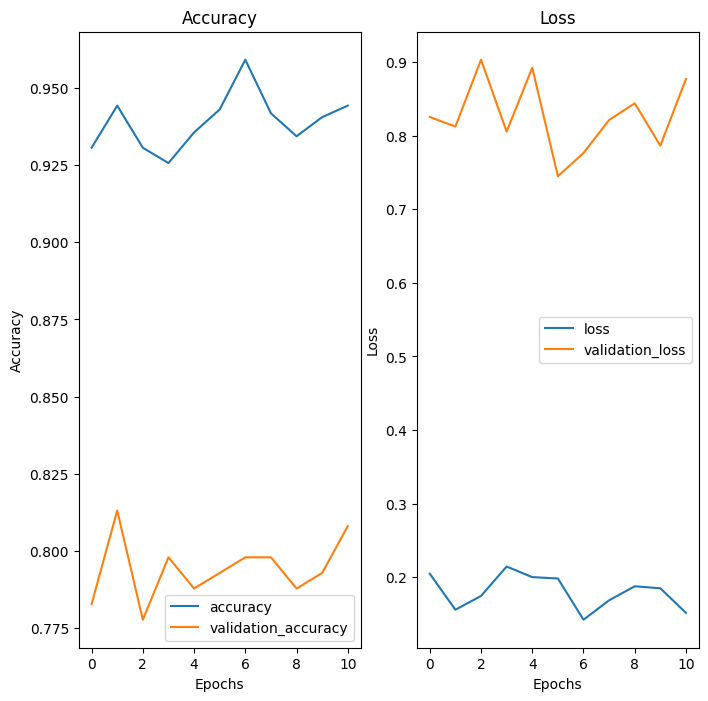

In [ ]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="validation_accuracy")
plt.legend()
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="validation_loss")
plt.legend()
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
# evaluating for testing data

test_loss,test_accuracy=model.evaluate(test_generator)

print(f"test loss:{test_loss}")
print(f"test accuracy:{test_accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 346ms/step - accuracy: 0.8907 - loss: 0.4037
test loss:0.3312056362628937
test accuracy:0.9064626097679138


In [ ]:
prediction=model.predict(test_generator)
prediction_class=np.argmax(prediction,axis=1)
print(prediction_class)

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step
[0 0 0 0 8 0 0 0 0 0 0 0 8 0 0 0 0 0 0 5 0 8 0 0 0 0 0 0 1 1 1 1 1 8 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 8 1 1 4 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 8 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 8 1 0 2 2 2 2 2 2 2 2 2 2 2 8 2 4 8 1 1 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 1 3 3 3 3 3 3 2 3 4 4 2 4 4 6 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 8 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 8 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 6 5 5 5 5 5 5 5 5 6 6 6 6 6 2 6 6 0 8 6 6 6 6 0 6 6
 7 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 6 6 6 6 6 6 0 0 6 8 6
 6 6 6 0 6 8 6 6 6 5 6 0 6 6 6 6 0 6 6 6 6 6 0 6 6 6 6 6 6 6 6 6 6 6 8 6 6
 8 6 6 6 6 6 6 6 6 6 7 7 0 6 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 0 8 8 8 8 8 8 8
 8 8 8 4 1 8 8 8 8 0 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 

In [ ]:
actual_class=test_generator.classes
label_class=test_generator.class_indices.keys()
print(actual_class)
print(label_class)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 

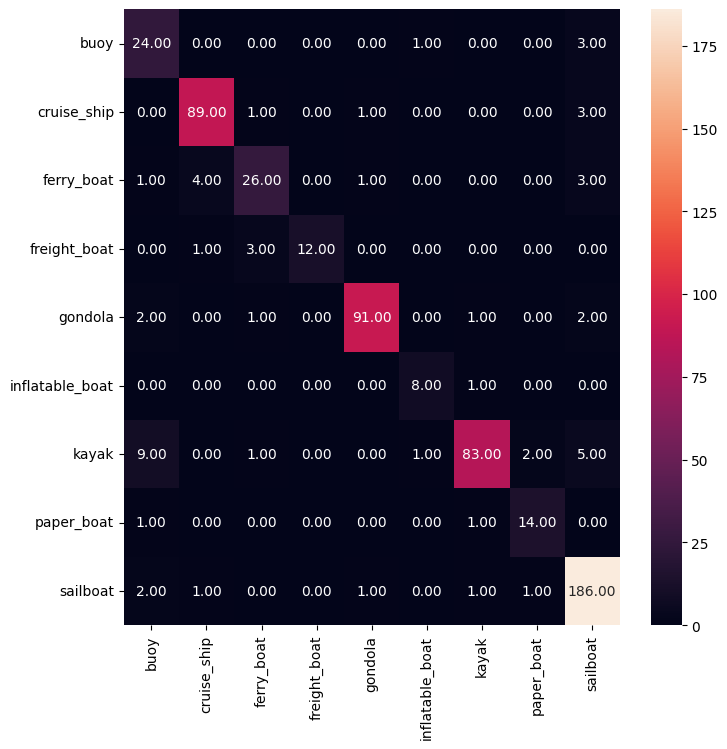

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(actual_class,prediction_class)


plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,xticklabels=label_class,yticklabels=label_class,fmt=".2f")
plt.show()

In [ ]:
print(classification_report(actual_class,prediction_class,target_names=label_class))

                 precision    recall  f1-score   support

           buoy       0.62      0.86      0.72        28
    cruise_ship       0.94      0.95      0.94        94
     ferry_boat       0.81      0.74      0.78        35
   freight_boat       1.00      0.75      0.86        16
        gondola       0.97      0.94      0.95        97
inflatable_boat       0.80      0.89      0.84         9
          kayak       0.95      0.82      0.88       101
     paper_boat       0.82      0.88      0.85        16
       sailboat       0.92      0.97      0.94       192

       accuracy                           0.91       588
      macro avg       0.87      0.87      0.86       588
   weighted avg       0.91      0.91      0.91       588

